In [21]:
%pylab inline
import illustris_python as il
from sklearn.neighbors import NearestNeighbors

Populating the interactive namespace from numpy and matplotlib


In [6]:
import illustris_python as il

In [7]:
basePath = '/homecolab/je.forero/data/illustris/illustris-1/'

In [8]:
halos = il.groupcat.loadHalos(basePath,135)
subhalos = il.groupcat.loadSubhalos(basePath,135)

In [31]:
hubble = 0.7

In [32]:
print halos.keys()
print subhalos.keys()

[u'Group_M_Crit200', u'Group_R_Mean200', u'GroupMass', u'Group_M_Mean200', u'GroupStarMetallicity', u'GroupVel', u'GroupBHMass', u'GroupMassType', u'Group_R_Crit200', u'GroupFirstSub', u'GroupSFR', u'GroupPos', u'Group_M_TopHat200', u'Group_M_Crit500', u'GroupLenType', u'Group_R_Crit500', u'GroupNsubs', u'Group_R_TopHat200', u'GroupGasMetallicity', 'count', u'GroupBHMdot', u'GroupWindMass', u'GroupLen']
[u'SubhaloPos', u'SubhaloBHMdot', u'SubhaloVmax', u'SubhaloWindMass', u'SubhaloGasMetallicityMaxRad', u'SubhaloVelDisp', u'SubhaloSFR', u'SubhaloStarMetallicityMaxRad', u'SubhaloLen', u'SubhaloSFRinHalfRad', u'SubhaloStellarPhotometrics', u'SubhaloGasMetallicity', u'SubhaloBHMass', u'SubhaloIDMostbound', u'SubhaloMassType', u'SubhaloStellarPhotometricsMassInRad', u'SubhaloHalfmassRad', u'SubhaloParent', u'SubhaloSpin', u'SubhaloStarMetallicityHalfRad', u'SubhaloVel', u'SubhaloLenType', u'SubhaloGasMetallicitySfrWeighted', u'SubhaloGasMetallicityHalfRad', u'SubhaloMassInRad', u'SubhaloGr

In [33]:
#mases are: Gas, DM, unused, tracers, stars+wind particles, black holes
halo_masses = halos['GroupMassType']
halo_M_crit200 = halos['Group_M_Mean200']
subhalo_vmax = subhalos['SubhaloVmax']
print shape(subhalo_vmax)
print subhalo_vmax.min(), subhalo_vmax.max()

(4366546,)
3.02388 894.78


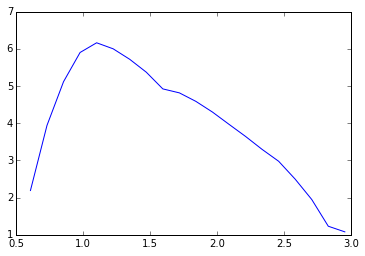

In [34]:
vals, edges = histogram(log10(subhalo_vmax), bins=20)
plot(edges[1:], log10(vals))

In [42]:
#selects the indices for two sets:
# 1. MW like
# 2. massive galaxies above 300 km/s
# 3. MW like + massive galaxies above 300 km/s

index_S1 = where((subhalo_vmax>200.0) & (subhalo_vmax<300.0))
index_S2 = where(subhalo_vmax>300.0)
index_S3 = where(subhalo_vmax>200.0)
n_S1 = size(index_S1)
n_S2 = size(index_S2)
n_S3 = size(index_S3)
print("size set S1: %d halos"%(n_S1))
print("size set S2: %d halos"%(n_S2))
print("size set S3: %d halos"%(n_S3))

size set S1: 1422 halos
size set S2: 350 halos
size set S3: 1772 halos


In [43]:
S3_pos = subhalos['SubhaloPos'][index_S3]/hubble
S3_vmax = subhalos['SubhaloVmax'][index_S3]/hubble
S3_vel = subhalos['SubhaloVel'][index_S3]
#https://github.com/forero/IllustrisLG/blob/master/code/LocalGroupSubVolumes.ipynb